<a href="https://colab.research.google.com/github/RaihanDwiPratama/digital_image_processing/blob/main/praktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

Gambar Asli:


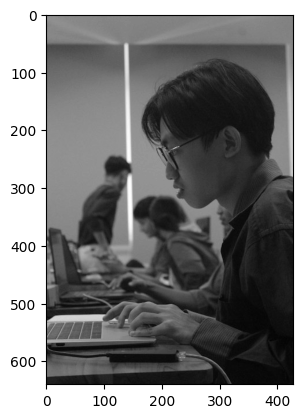

In [5]:
img1 = cv2.imread('/content/drive/MyDrive/Footage/Footage/mervin.jpg', 0)
print('Gambar Asli:')
plt.imshow(img1, cmap="gray")

In [6]:
tinggi, lebar = img1.shape[:2]
resolusi_spasial = (lebar, tinggi)
print('Resolusi Spasial Gambar:', resolusi_spasial)

Resolusi Spasial Gambar: (427, 640)


Resolusi gambar:
(160, 106)
Gambar Setelah Diturunkan Resolusinya


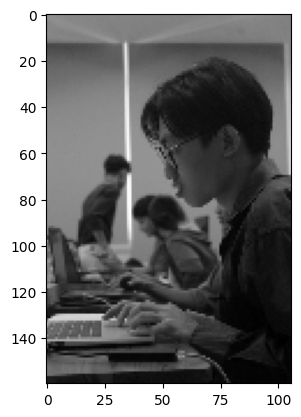

In [7]:
faktor_penurunan_resolusi = 4
img_diturunkan = cv2.resize(img1, (lebar // faktor_penurunan_resolusi, tinggi //
faktor_penurunan_resolusi))
print('Resolusi gambar:')
print(img_diturunkan.shape)
print('Gambar Setelah Diturunkan Resolusinya')
plt.imshow(img_diturunkan, cmap='gray')

Resolusi gambar yang Sudah Diturunkan: (160, 106)


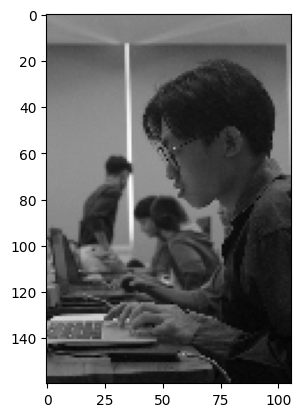

In [9]:
[m, n] = img1.shape
f=4
img2 = np.zeros((m//f, n//f), dtype=int)
for i in range(0, m, f):
  for j in range(0, n, f):
    try:
      img2[i//f][j//f] = img1[i][j]
    except IndexError:
      pass
    #if i//f < img1.shape[0] and j//f < img1.shape[1]:
    # img2[i, j] = img1[i//f, j//f]
print('Resolusi gambar yang Sudah Diturunkan:', img2.shape)
plt.imshow(img2, cmap="gray")

Resolusi gambar: 427 640
Gambar Setelah ditingkatkan Resolusinya


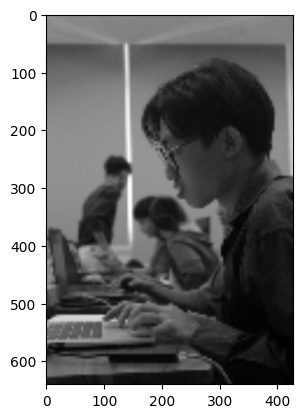

In [10]:
img_ditingkatkan = cv2.resize(img_diturunkan, (lebar, tinggi),
interpolation=cv2.INTER_LINEAR)
print('Resolusi gambar:', lebar, tinggi)
print('Gambar Setelah ditingkatkan Resolusinya')
plt.imshow(img_ditingkatkan, cmap='gray')

Gambar yang Sudah Ditingkatkan Resolusinya: (640, 427)


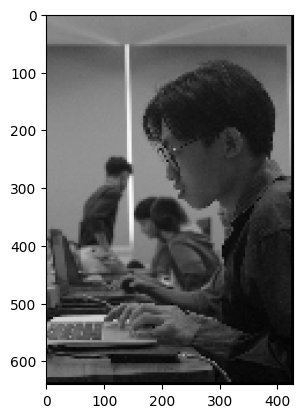

In [12]:
img3 = np.zeros((m, n), dtype=int)
for i in range(0, m-1, f):
  for j in range(0, n-1, f):
    try:
      img3[i, j] = img2[i//f][j//f]
    except IndexError:
      pass

for i in range(1, m-(f-1), f):
  for j in range(0, n-(f-1)):
    img3[i:i+(f-1), j] = img3[i-1, j]

for i in range(0, m-1):
  for j in range(1, n-1, f):
    img3[i, j:j+(f-1)] = img3[i, j-1]

print('Gambar yang Sudah Ditingkatkan Resolusinya:', img3.shape)
plt.imshow(img3, cmap="gray")

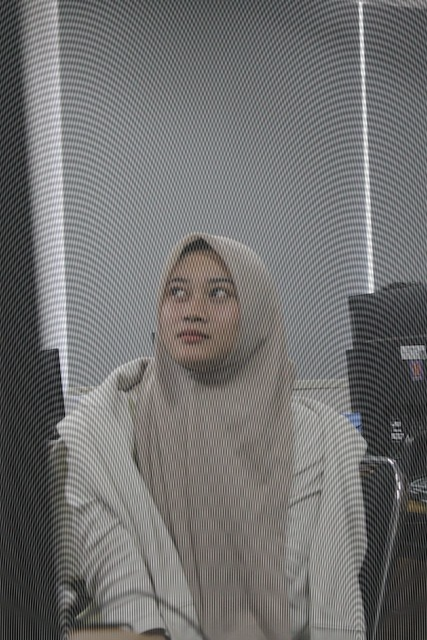

In [13]:
img5 = cv2.imread("/content/drive/MyDrive/Footage/Footage/rani.jpg")
mask = cv2.imread("/content/drive/MyDrive/Footage/Footage/moire.png")
mask = cv2.resize(mask, (img5.shape[1], img5.shape[0]))
alpha = 0.7
beta = (1.0 - alpha)
gamma = 0.0
masked_img = cv2.addWeighted(img5, alpha, mask, beta, gamma)
cv2_imshow(masked_img)

In [14]:
img = cv2.imread('/content/drive/MyDrive/Footage/peppers3.tif')
Z = img.reshape((-1,3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):
  ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((img.shape))
  return res2

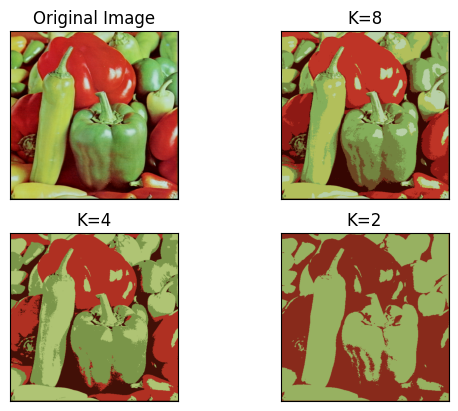

In [15]:
plt.subplot(221),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(cv2.cvtColor(colorQuant(Z, 8, criteria),
cv2.COLOR_BGR2RGB))
plt.title('K=8'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(cv2.cvtColor(colorQuant(Z, 4, criteria),
cv2.COLOR_BGR2RGB))
plt.title('K=4'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(cv2.cvtColor(colorQuant(Z, 2, criteria),
cv2.COLOR_BGR2RGB))
plt.title('K=2'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
img = cv2.imread("/content/drive/MyDrive/Footage/frog.tif")
print(img.shape)

(498, 621, 3)


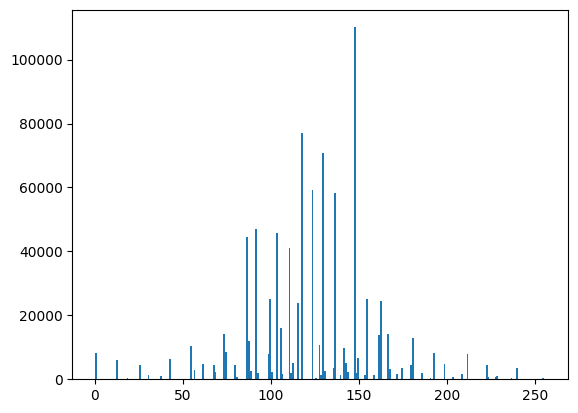

In [18]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

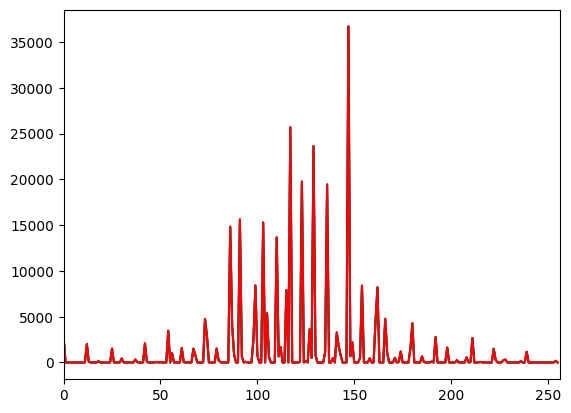

In [19]:
color = ('b','g','r')
for i, col in enumerate(color):
  histr = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr, color=col)
  plt.xlim([0, 256])

plt.show()